In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS blue arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.604.Blue.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.1,ErrL.1,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
0,1,214.5600,19.6,1,604a1_779-001004.xlsx,4809.715,10.003,-14.310,0.000,2.583,...,10.250,17.820,4961.214,27.812,41.454,52.778,0.6969,0.4512,30.75,53.460
1,2,213.1296,19.6,1,604a1_779-005008.xlsx,4861.424,10.792,-4.098,51.891,-4.734,...,-8.312,-8.531,4998.893,0.692,4.125,0.000,-5.6790,0.0000,-24.94,-25.590
2,3,211.6992,19.6,1,604a1_779-009012.xlsx,4855.140,0.822,2.562,1.256,-5.215,...,-64.520,-22.320,5022.750,12.843,69.658,32.632,-2.6100,0.7990,-193.60,-66.960
3,4,210.2688,19.6,1,604a1_779-013016.xlsx,4852.843,0.305,-1.164,0.923,-9.482,...,-3.841,-1.507,5004.753,0.192,0.961,0.346,-11.2600,4.0020,-11.52,-4.521
4,5,208.8384,19.6,1,604a1_779-017020.xlsx,4875.295,0.294,0.489,0.375,8.143,...,-1.367,-4.403,5004.175,0.000,0.787,0.000,-4.8920,0.0000,-4.10,-13.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,146,7.1520,0.0,10,604a10_797-581584.xlsx,4856.928,0.161,-0.627,0.279,-14.500,...,69.770,28.860,5030.822,19.344,-94.366,32.250,-2.0840,0.4448,209.30,86.570
1496,147,5.7216,0.0,10,604a10_797-585588.xlsx,4857.439,1.123,5.041,2.315,-5.168,...,-6.108,-2.878,5000.963,0.715,2.900,1.353,-5.9360,2.7850,-18.32,-8.635
1497,148,4.2912,0.0,10,604a10_797-589592.xlsx,4856.136,0.844,2.055,1.016,-4.560,...,-9.537,-3.753,5005.201,0.987,4.789,2.062,-5.6130,2.7540,-28.61,-11.260
1498,149,2.8608,0.0,10,604a10_797-593596.xlsx,4854.656,0.306,0.592,0.236,18.680,...,-3755.000,-8549.000,5138.393,315.693,843.770,577.680,-12.5400,21.6200,-11270.00,-25650.000


In [3]:
i=1#[OIII]4959
Dt1=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt1=pd.DataFrame(Dt1).T
Dt1.describe()

,X,Y,Center.1,ErrC.1,Width.1,ErrW.1,Peak.1,ErrP.1,Line.1,ErrL.1
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1500.000000,1.500000e+03,1.499000e+03
mean,107.995200,9.390000,4453.616969,3.513637,8.818110,7.492879,-6.558000e+16,459.001340,3.533333e+19,1.728486e+18
std,61.957416,6.252917,1509.517364,24.756266,117.613439,65.462914,2.539902e+18,11173.872866,1.368454e+21,6.692164e+19
min,1.430400,0.000000,0.000000,0.000000,-773.114000,0.000000,-9.837000e+19,0.000000,-6.984000e+05,-8.681000e+04
25%,54.355200,4.000000,4952.959500,0.023000,0.161750,0.047750,-1.705000e+00,0.475475,-3.877500e+00,-2.179500e+00
50%,107.995200,9.000000,4954.055000,0.194000,1.078500,0.358000,0.000000e+00,1.104500,0.000000e+00,0.000000e+00
75%,161.635200,15.000000,4955.632750,0.751500,2.389750,1.193500,5.495500e+00,1.704500,6.377500e+00,1.912500e+00
max,214.560000,19.600000,7094.210000,485.224000,1873.024000,1310.279000,5.941000e+09,379500.000000,5.300000e+22,2.591000e+21


In [4]:
i=2#[OIII]5007
Dt2=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt2=pd.DataFrame(Dt2).T
Dt2.describe()

,X,Y,Center.2,ErrC.2,Width.2,ErrW.2,Peak.2,ErrP.2,Line.2,ErrL.2
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03,1.500000e+03,1.500000e+03,1.500000e+03
mean,107.995200,9.390000,4497.254185,3.513637,8.818110,7.492879,-1.967333e+17,1.376603e+03,1.060000e+20,5.182000e+18
std,61.957416,6.252917,1524.257595,24.756266,117.613439,65.462914,7.619449e+18,3.350938e+04,4.105362e+21,2.006980e+20
min,1.430400,0.000000,0.000000,0.000000,-773.114000,0.000000,-2.951000e+20,0.000000e+00,-2.095000e+06,-2.604000e+05
25%,54.355200,4.000000,5001.589250,0.023000,0.161750,0.047750,-5.114000e+00,1.426250e+00,-1.163250e+01,-6.537250e+00
50%,107.995200,9.000000,5002.685000,0.194000,1.078500,0.358000,0.000000e+00,3.313000e+00,0.000000e+00,0.000000e+00
75%,161.635200,15.000000,5004.262750,0.751500,2.389750,1.193500,1.649000e+01,5.114250e+00,1.913000e+01,5.736750e+00
max,214.560000,19.600000,7142.840000,485.224000,1873.024000,1310.279000,1.782000e+10,1.138000e+06,1.590000e+23,7.773000e+21


[OIII]4959

Peak

(0.0, 150.0, 0.0, 10.0)

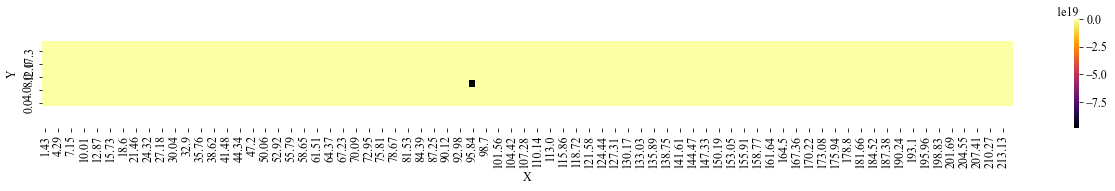

In [5]:
data_P=(Dt1.round(2)).pivot(index='Y', columns='X', values='Peak.1')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 28.0, 0.0, 9.0)

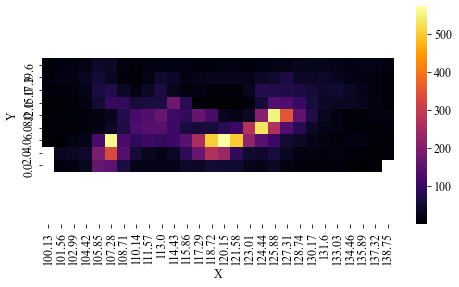

In [6]:
mP1=(Dt1.X>100)&(Dt1.X<140)&(Dt1["Peak.1"]>0)&(Dt1["Peak.1"]<10000)
data_P1=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='Peak.1')#TableFormat

sz=4
wd=Dt1[mP1].X.max()-Dt1[mP1].X.min()
hd=Dt1[mP1].Y.max()-Dt1[mP1].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P1, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [7]:
l=[4958.91]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt1["Center.1"]-l)/l
RV=RVo+corrhelio

Dt1=Dt1.assign(RV=RV.values)

(0.0, 28.0, 0.0, 9.0)

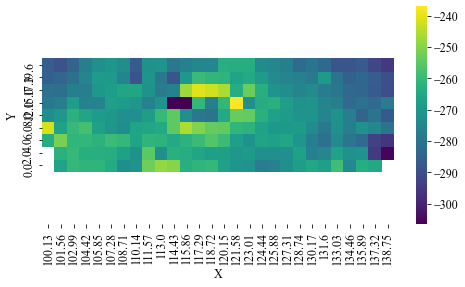

In [8]:
data_VR=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

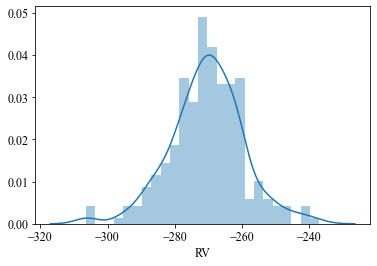

In [9]:
sns.distplot(Dt1.RV[mP1],bins=25)

In [10]:
Dt1I=Dt1[mP1]
mR1=(Dt1I.RV>-290)&(Dt1I.RV<-245)

(0.0, 28.0, 0.0, 9.0)

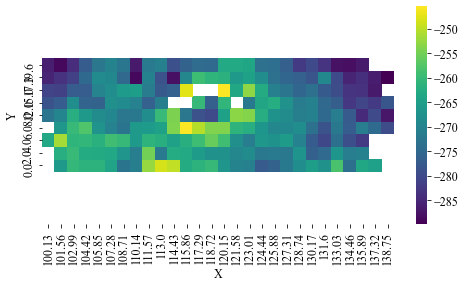

In [11]:
data_VR=(Dt1I[mR1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

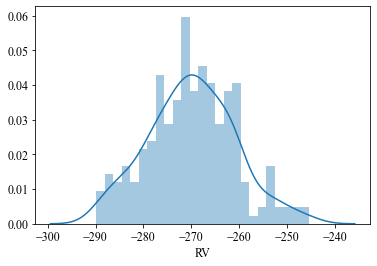

In [12]:
sns.distplot(Dt1I.RV[mR1],bins=25)

Sigma

In [13]:
T=8350#K Table 5

Xw=15.9994#
SI=19#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt1I["Width.1"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt1I=Dt1I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 28.0, 0.0, 9.0)

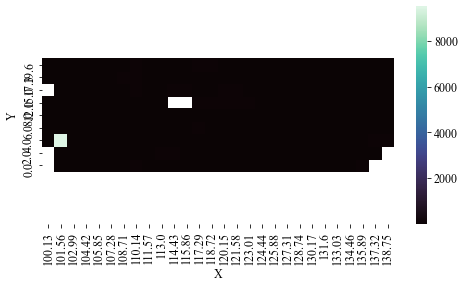

In [14]:
data_SR=(Dt1I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

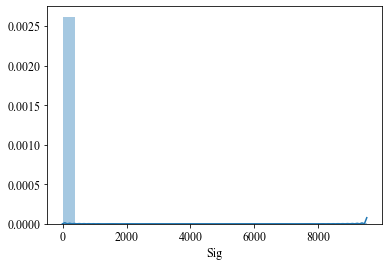

In [15]:
sns.distplot(Dt1I.Sig,bins=25)

In [16]:
Dt1II=Dt1I[mR1]
mS1=Dt1II.Sig<60

(0.0, 28.0, 0.0, 9.0)

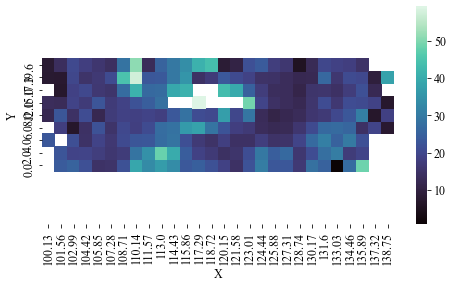

In [17]:
data_S1=(Dt1II[mS1].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_S1, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

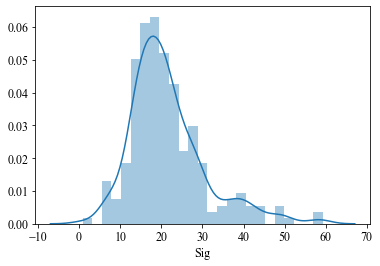

In [18]:
sns.distplot(Dt1II[mS1].Sig,bins=25)

[OIII]5007

Peak

(0.0, 150.0, 0.0, 10.0)

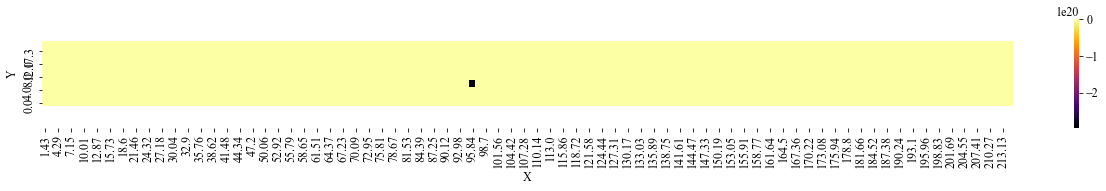

In [19]:
data_P2=(Dt2.round(2)).pivot(index='Y', columns='X', values='Peak.2')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

(0.0, 28.0, 0.0, 9.0)

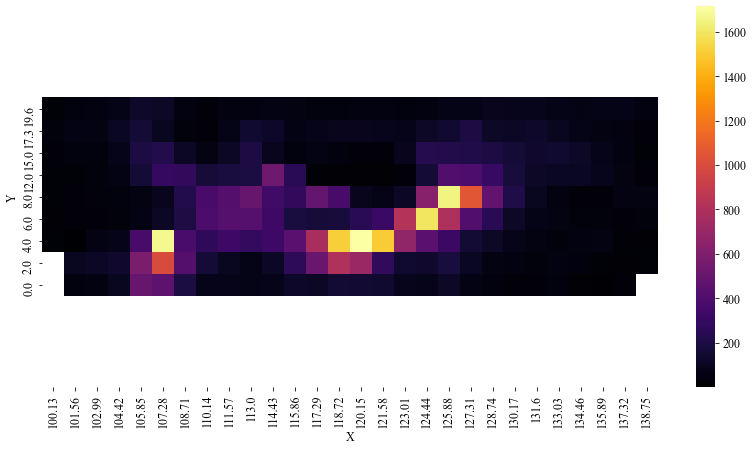

In [20]:
mP2=(Dt2.X>100)&(Dt2.X<140)&(Dt2["Peak.2"]>0)&(Dt2["Peak.2"]<10000)
data_P2=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='Peak.2')#TableFormat

sz=7
wd=Dt2[mP2].X.max()-Dt2[mP2].X.min()
hd=Dt2[mP2].Y.max()-Dt2[mP2].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [21]:
l=[5006.84]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt2["Center.2"]-l)/l
RV=RVo+corrhelio

Dt2=Dt2.assign(RV=RV.values)

(0.0, 28.0, 0.0, 9.0)

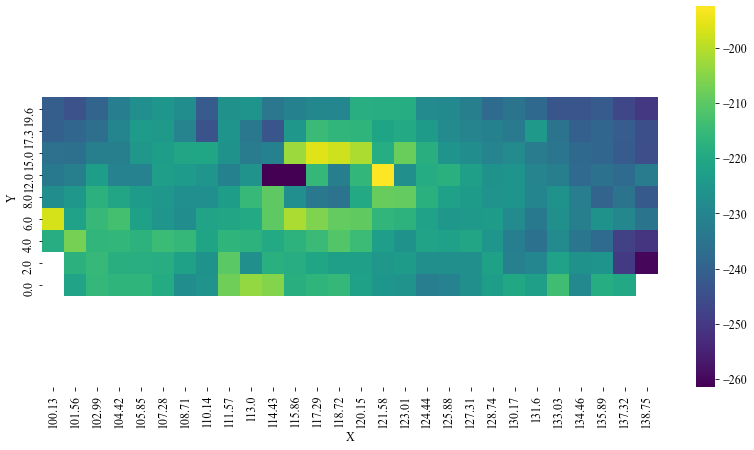

In [22]:
data_VB=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

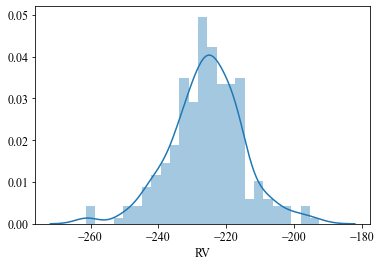

In [23]:
sns.distplot(Dt2[mP2].RV,bins=25)

In [24]:
Dt2I=Dt2[mP2]
mR2=(Dt2I.RV>-260)&(Dt2I.RV<-200)

(0.0, 28.0, 0.0, 9.0)

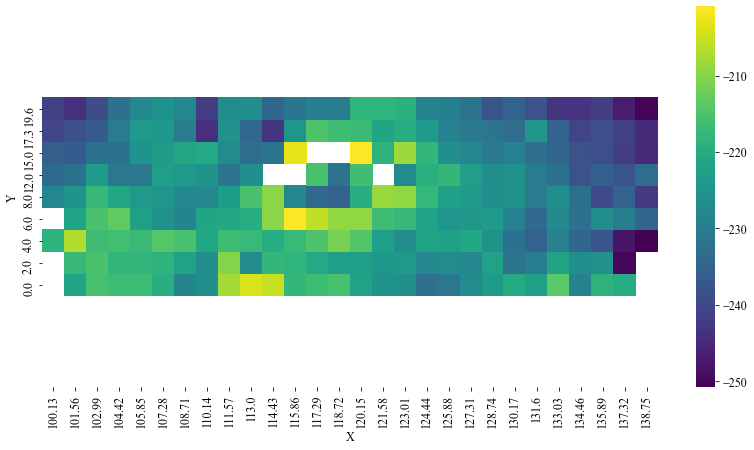

In [25]:
data_VB=(Dt2I[mR2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

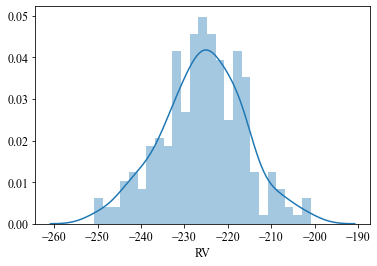

In [26]:
sns.distplot(Dt2I[mR2].RV,bins=25)

In [27]:
T=8350#K Table 5

Xw=15.9994#
SI=19#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt2I["Width.2"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt2I=Dt2I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 28.0, 0.0, 9.0)

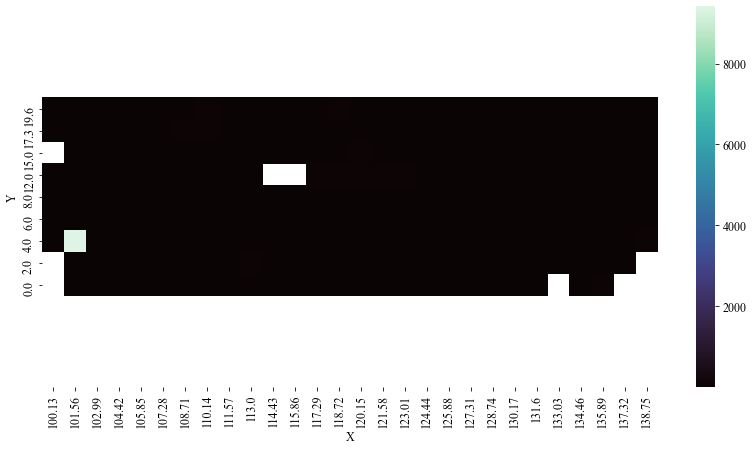

In [28]:
data_SB=(Dt2I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

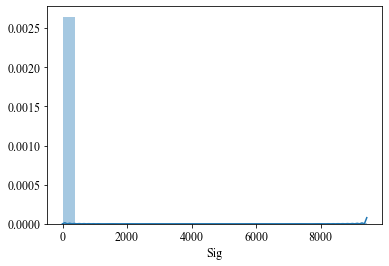

In [29]:
sns.distplot(Dt2I.Sig,bins=25)

In [30]:
Dt2II=Dt2I[mR2]
mS2=((Dt2II["Sig"]<70))

(0.0, 28.0, 0.0, 9.0)

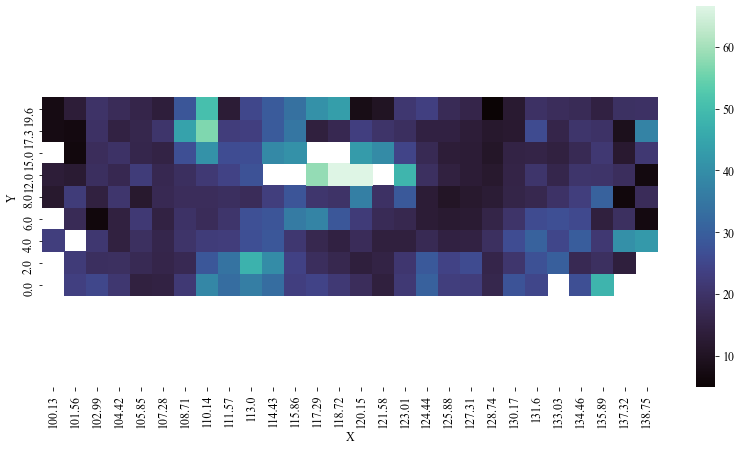

In [31]:
data_SB=(Dt2II[mS2].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

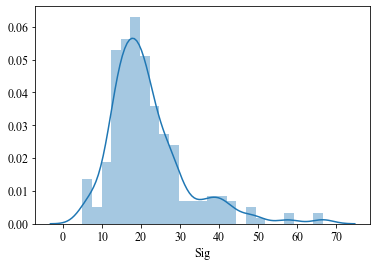

In [32]:
sns.distplot(Dt2II[mS2].Sig,bins=25)

Comparison

In [33]:
Dt1c=Dt1II[mS1]
Dt2c=Dt2II[mS2]

Peak

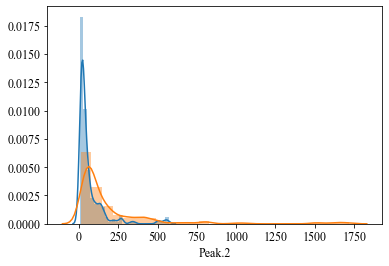

In [34]:
sns.distplot(Dt1c["Peak.1"],bins=25)
sns.distplot(Dt2c["Peak.2"],bins=25)

Normalize emission

In [35]:
PeakN=Dt1c["Peak.1"]/Dt1c["Peak.1"].max()
Dt1c=Dt1c.assign(PeakN=PeakN.values)

In [36]:
PeakN=Dt2c["Peak.2"]/Dt2c["Peak.2"].max()
Dt2c=Dt2c.assign(PeakN=PeakN.values)

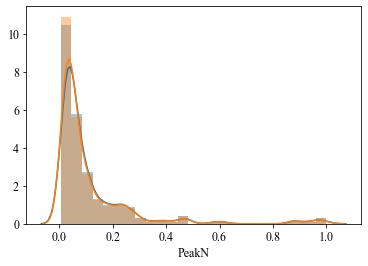

In [37]:
sns.distplot(Dt1c["PeakN"],bins=25)
sns.distplot(Dt2c["PeakN"],bins=25)

Radial Velocity

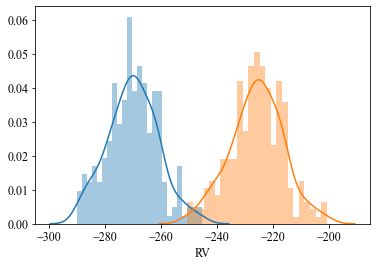

In [38]:
sns.distplot(Dt1c.RV,bins=25)
sns.distplot(Dt2c.RV,bins=25)

Sigma

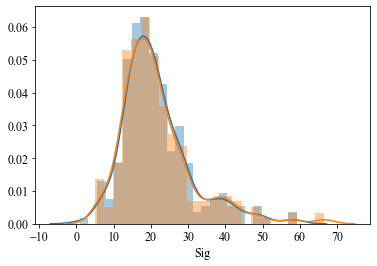

In [39]:
sns.distplot(Dt1c.Sig,bins=25)
sns.distplot(Dt2c.Sig,bins=25)

Structure Function

In [40]:
pc=4.16

1.4303999999999917


[None, None]

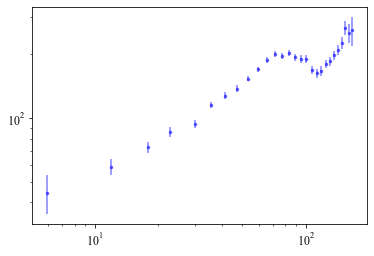

In [41]:
SF=sosf(Dt1c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [42]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt1c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([20.44928818])

In [43]:
s=SFr[0]

In [44]:
ss=np.round((Dt1c["RV"].std())**2,2)

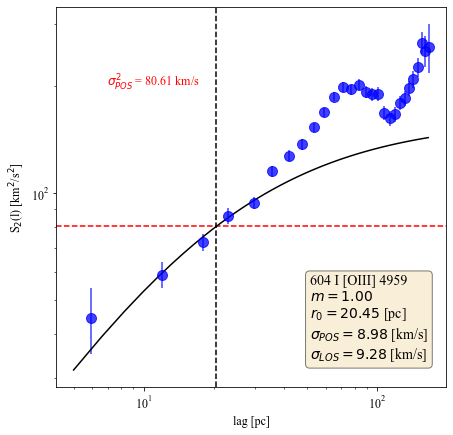

In [45]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('604 I [OIII] 4959' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt1c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt1c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [46]:
SF1=SF

1.4303999999999917


[None, None]

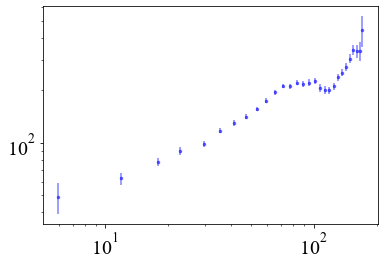

In [47]:
SF=sosf(Dt2c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [48]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt2c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([22.94756653])

In [49]:
s=SFr[0]

In [50]:
ss=np.round((Dt2c["RV"].std())**2,2)

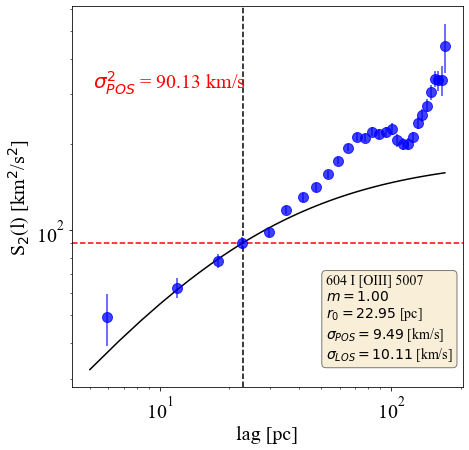

In [51]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('604 I [OIII] 5007' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt2c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt2c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [52]:
SF2=SF

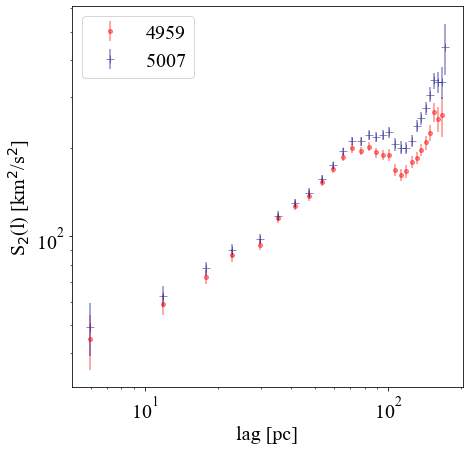

In [53]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF1.Lag,SF1.Nmqvd, yerr=SF1.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.45, markersize=8,label='4959')

ax.errorbar(SF2.Lag,SF2.Nmqvd, yerr=SF2.ErrY, marker='+', fmt=' ',color="navy", ecolor="navy",
                     alpha=0.45, markersize=8,label='5007')

plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

[Text(0, 0.5, '$σ$ [km/s]'), Text(0.5, 0, 'I')]

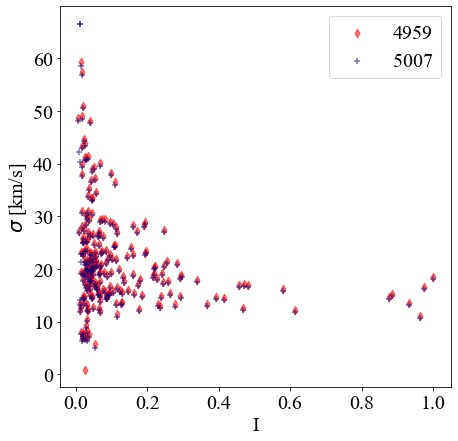

In [57]:
fig,ax=plt.subplots(figsize=(7,7))

plt.scatter(Dt1c["Peak.1"]/Dt1c["Peak.1"].max(),Dt1c["Sig"],alpha=0.55,marker='d',color="red",label='4959')
plt.scatter(Dt2c["Peak.2"]/Dt2c["Peak.2"].max(),Dt2c["Sig"],alpha=0.55,marker='+',color="navy",label='5007')
plt.legend()
ax.set(xlabel='I', ylabel='$σ$ [km/s]')

In [55]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 42.618901014328 seconds ---
